# GGS Segmentation
In this notebook, we use the GGS algorithm from the sktime package to segment the challenge data.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from sktime.annotation.ggs import GreedyGaussianSegmentation
from sktime.annotation.plotting.utils import plot_time_series_with_change_points

from utils import load_data, to_submission

First, we load the 250 time series (TS) as a pandas DataFrame. Each row corresponds to a twelve-dimensional TS and every column contains one channel of sensor data.

In [2]:
df = load_data()
# df.head()

For demonstration, we segment one channel and only a subset of the 250 TS. We plot the segmentations and store the change points (CPs) for the submission.

Using channels: ['x-acc', 'y-acc', 'z-acc']


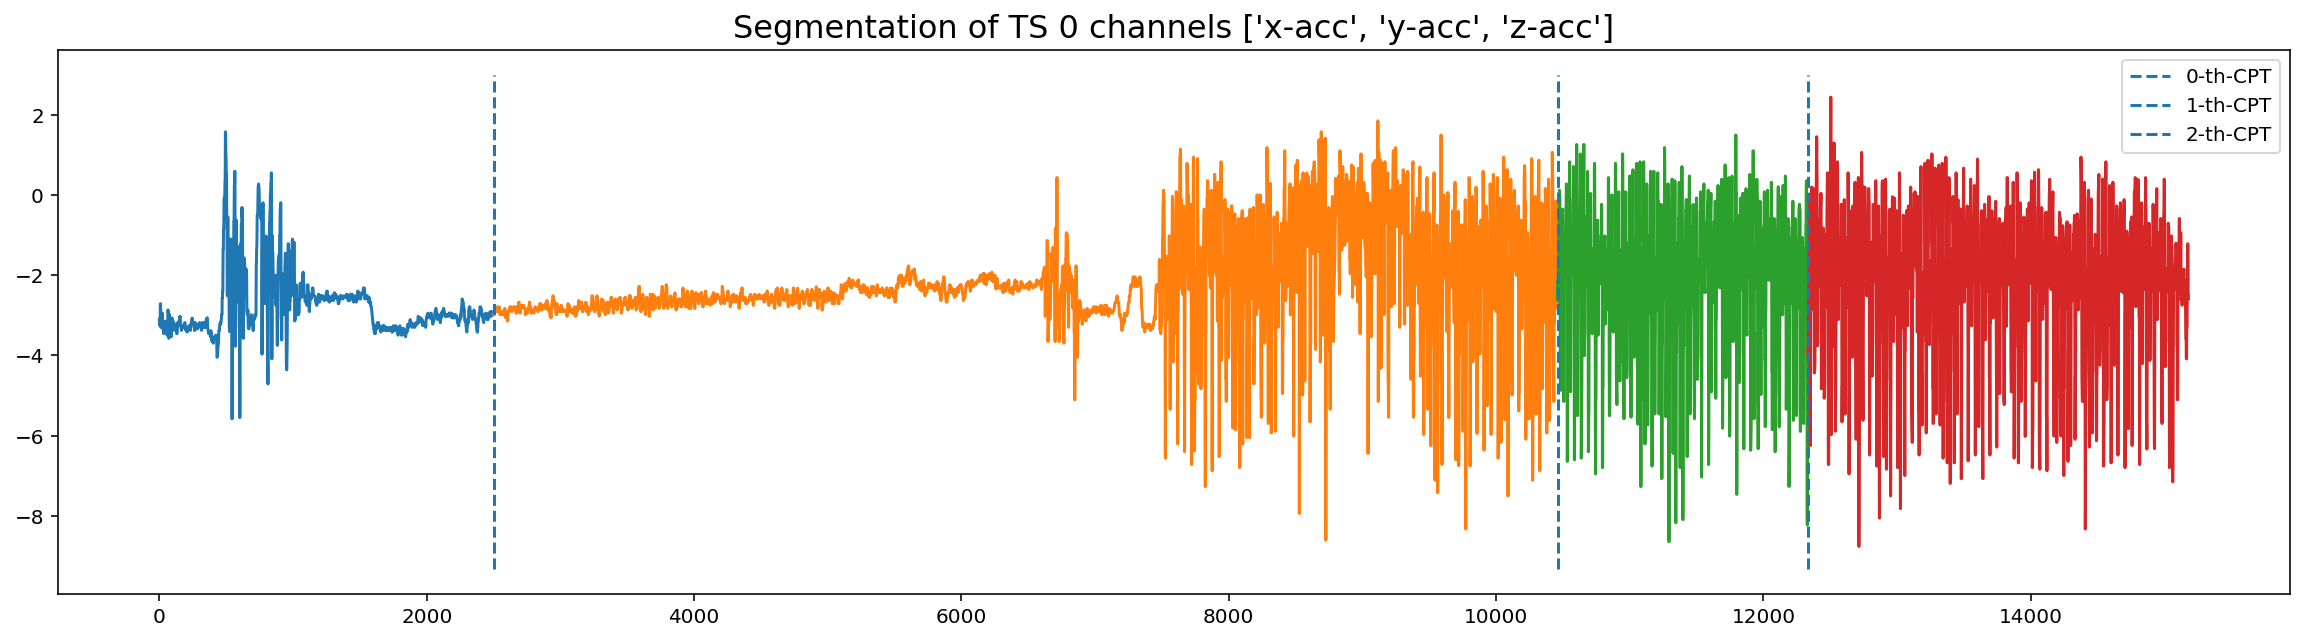

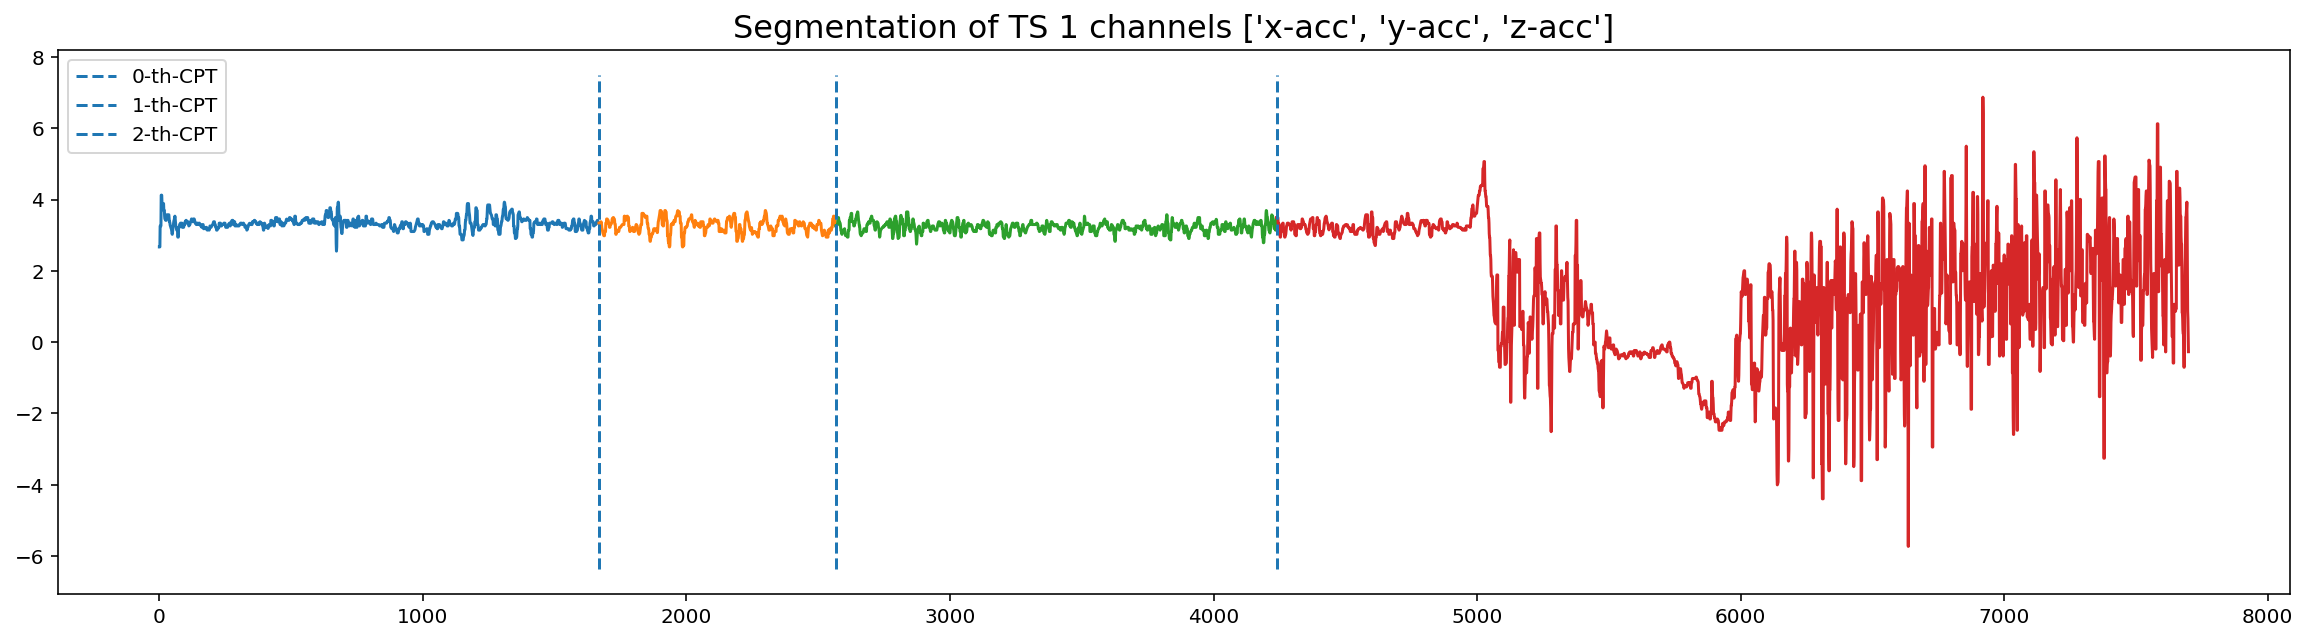

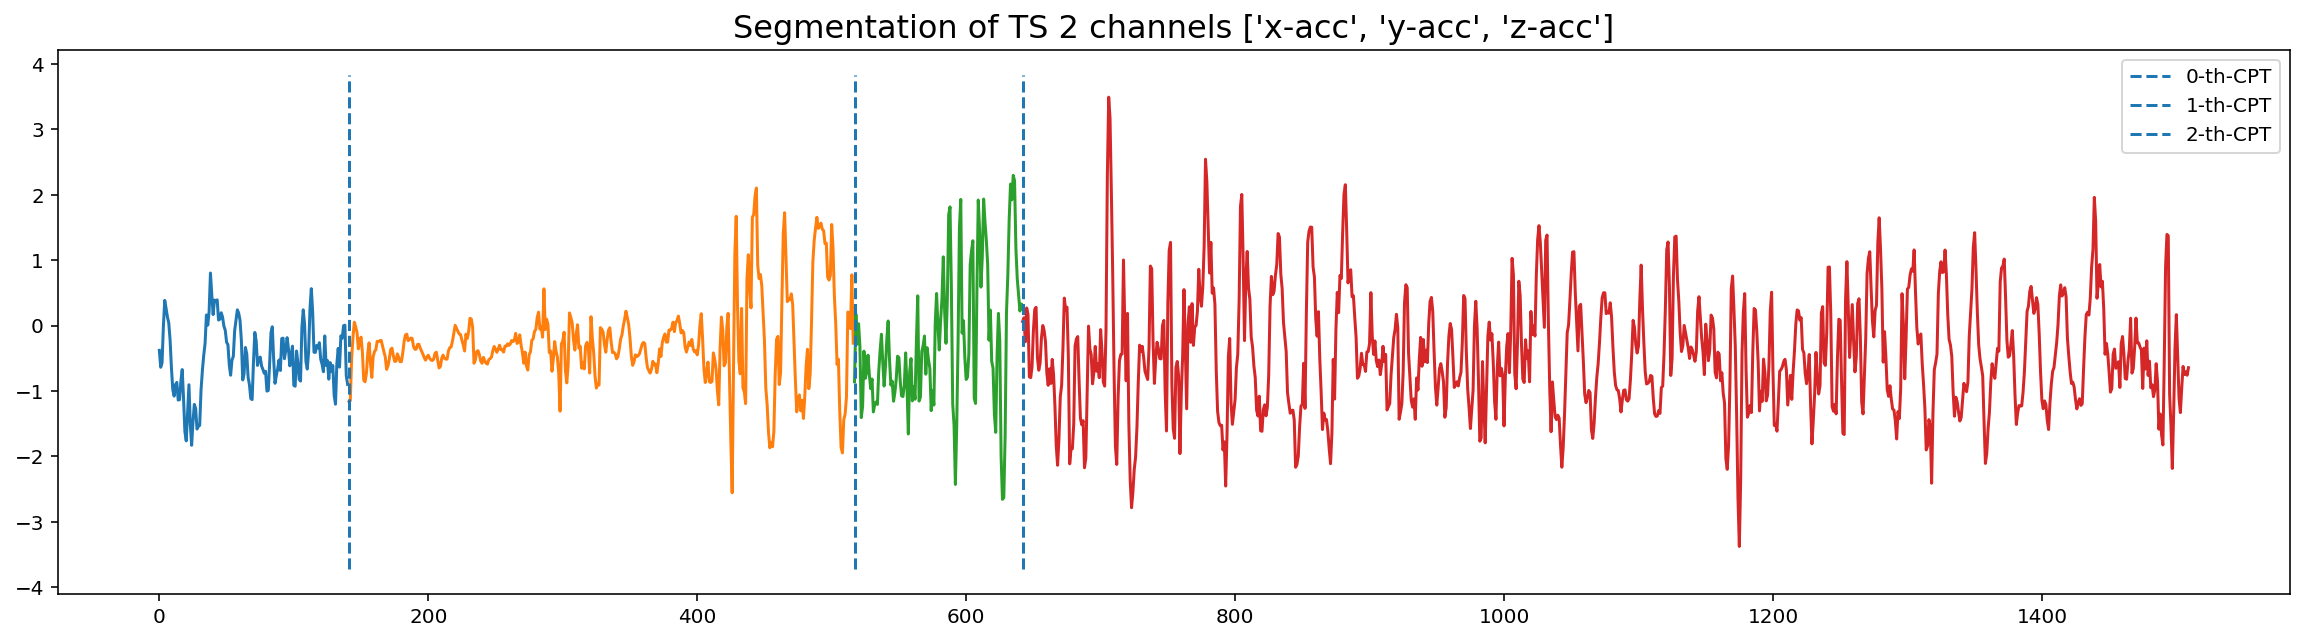

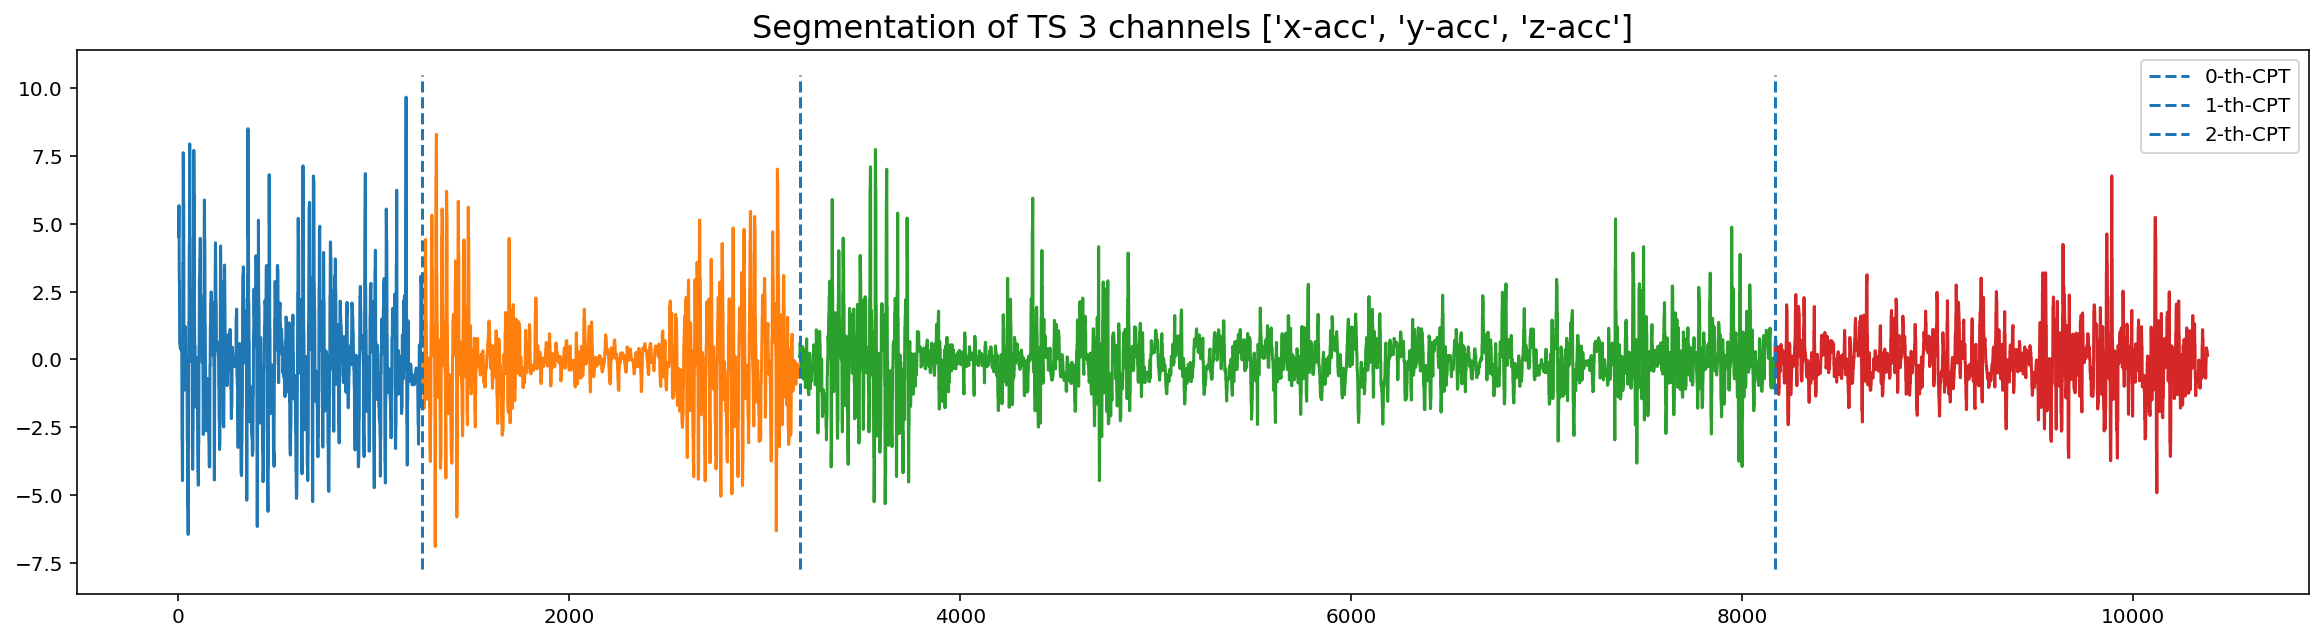

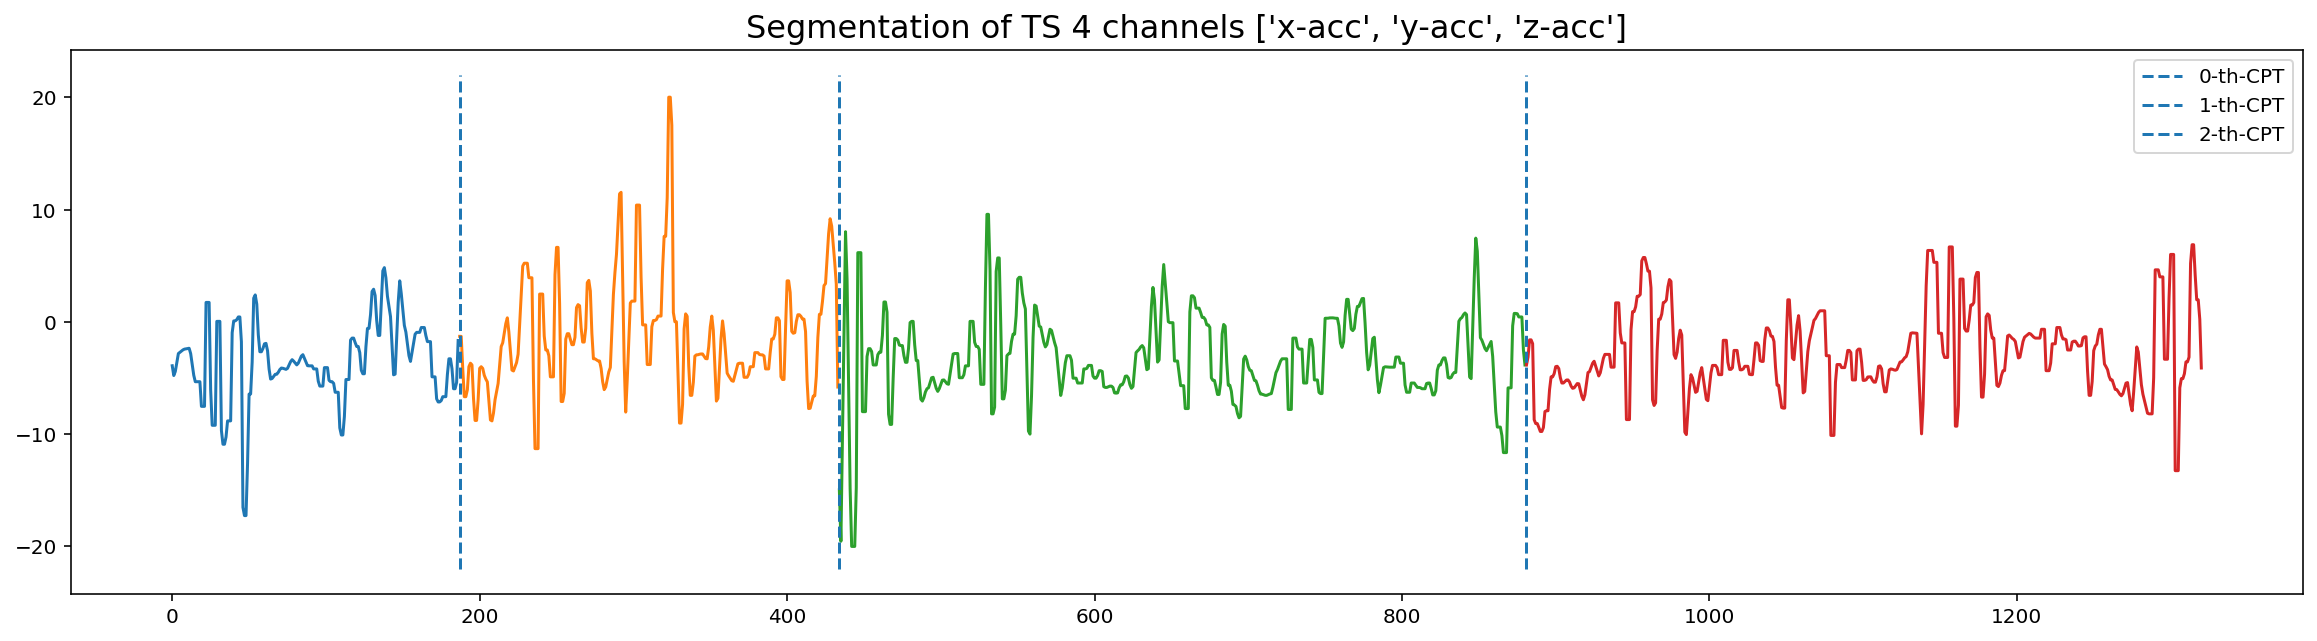

In [3]:
# use only one channel
channels = ["x-acc", "y-acc", "z-acc"] # , "x-gyro", "y-gyro", "z-gyro"
print(f"Using channels: {channels}")

# segment the first 5 TS
subset = 5
change_points = []
n_cps = 3

for idx, row in df.iloc[:subset,:].iterrows():
    ts = row[channels]

    X = np.concatenate(ts, axis=0).reshape(-1, len(channels))
    ggs = GreedyGaussianSegmentation(k_max=n_cps)
    ggs.fit_predict(X)
    found_cps = ggs.change_points_

    if (len(found_cps) >= 2):
        # remove start and end of the series
        found_cps = found_cps[1:-1] 

    change_points.append(found_cps)

    fig, ax = plot_time_series_with_change_points(
        f"Segmentation of TS {idx} channels {channels}", pd.Series(ts[channels[0]]), found_cps)
    plt.show()

To make a submission, simply run the last cell for all 250 TS and then format the CPs in the correct way and hand in your results.

In [4]:
submission = to_submission(df.iloc[:subset,:], change_points)
submission.head()
# submission.to_csv("submission.csv", index=False)

,ts_id,segment
0,0,1 2501
1,0,2502 7959
2,0,10461 1873
3,0,12334 2846
4,1,1 1668
